# Approximation

Is the process of **finding a function that is close to a given dataset**.

In [1]:
from typing import Callable

import numpy as np

### Linear Regression

Returns a linear function in the form of $y = mx + b$ that best fits the given dataset.

In [2]:
def linear_regression(x, y) -> Callable:
    """
    Interpolate the data (x, y)

    :param x: the x values
    :param y: the y values
    :return: the linear regression function in the form y = mx + b
    """
    # ! return np.poly1d(np.polyfit(x, y, 1))  # but we won't use this because wi'll implement it ourselves
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    # cov = np.mean(x * y) - x_mean * y_mean  # covariance
    # m = cov / np.var(x)  # slope
    m = (np.mean(x * y) - x_mean * y_mean) / np.var(x)  # slope
    b = y_mean - m * x_mean  # y-intercept
    print(f'y = {m}x + {b}')
    return lambda x: m * x + b

### Exponential Regression

Returns an exponential function in the form of $y = a\cdot m^x$ that best fits the given dataset.

Where $a = e^b$ is the y-intercept and $m$ is the growth rate.

In [3]:
def exponential_regression(x, y) -> Callable:
    """
    Interpolate the data (x, y)

    :param x: the x values
    :param y: the y values
    :return: the exponential regression function in the form y = a * e^(bx)
    """
    # ! return np.exp(np.polyfit(np.log(x), y, 1, full=True))  # but we won't use this because wi'll implement it ourselves
    y = np.log(y)  # we need to take the log of 'y' because we want to find the slope of the log of 'y'
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    m = (np.mean(x * y) - x_mean * y_mean) / np.var(x)  # slope
    b = y_mean - m * x_mean  # y-intercept
    print(f'y = {np.exp(b)}e^{m}x')  # we need to take the exponential of 'b' because we took the log of 'y'
    return lambda x: np.exp(m * x + b)

### Power Regression

Returns a power function in the form of $y = ax^b$ that best fits the given dataset.

Where $a = e^b$ is the y-intercept.


In [4]:
def power_regression(x, y) -> Callable:
    """
    Interpolate the data (x, y)

    :param x: the x values
    :param y: the y values
    :return: the power regression function
    """
    # ! return np.poly1d(np.polyfit(np.log(x), np.log(y), 1, full=True))  # but we won't use this because wi'll implement it ourselves
    x = np.log(x)
    y = np.log(y)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    # cov = np.mean(x * y) - x_mean * y_mean  # covariance
    # m = cov / np.var(x)  # slope
    m = (np.mean(x * y) - x_mean * y_mean) / np.var(x)  # slope
    b = y_mean - m * x_mean  # y-intercept
    print(f'y = {np.exp(b)}x^{m}')  # we need to take the exponential of 'b' because we took the log of 'y'
    return lambda x: np.exp(m * np.log(x) + b)

### Polynomial Regression (curve fitting process)

Is a generalization of linear regression that fits a polynomial function of degree $n$ to the given dataset.

It use a variation of the polynomial function in the form of $y =\Sigma {a_nx^n} = a_0 + a_1x + a_2x^2 + ... + a_nx^n$. Where $a_0$ is the y-intercept and $a_1$ is the slope.

In [5]:
def polynomial_regression(x, y, degree: int = 2) -> Callable:
    """
    Also known as Curve Fitting process
    Interpolate the data (x, y)

    :param x: the x values
    :param y: the y values
    :return: the polynomial regression function in the form y = ax^2 + bx + c
    """
    # ! return np.poly1d(np.polyfit(x, y, degree))  # but we won't use this because wi'll implement it ourselves
    A = np.zeros((degree + 1, degree + 1))  # degree+1 square matrix
    for row in range(degree + 1):
        for column in range(degree + 1): 
            A[row][column] = np.sum(x ** (row + column))
    # print(f'A = {A}')
    b = np.zeros(degree + 1)  # degree+1 column vector (results)
    for row in range(degree + 1):
        b[row] = np.sum((x ** row) * y)
    # print(f'b = {b}')
    x = np.linalg.solve(A, b)  # A * x = b => x = A^-1 * b
    # print(f'x = {x}')
    print(f'y = ', end='')
    for i in range(degree + 1):
        print(f'{x[i]:.4f}x^{i}', end='') if i == degree else print(f'{x[i]:.4f}x^{i} + ', end='')
        # print(f'{x[i]:}x^{i}', end='') if i == degree else print(f'{x[i]:}x^{i} + ', end='')
    print()  # new line
    return lambda x: np.sum([x ** i * x[i] for i in range(degree + 1)])

In [8]:
if __name__ == '__main__':
    # Create some data.
    # x = np.linspace(0, 10, 10)
    # y = np.linspace(1, 21, 11)

    x = np.array([ 23,  21,  23,  21,  21,  21,  21,  21,  21,  21,  23,  27,  24,  23,  25,  21,  22,  21,  21])  # age
    y = np.array([7.9, 8.1, 8.1, 8.7, 8.6, 8.7, 8.7, 8.7, 8.8, 8.4, 7.9, 8.6, 8.3, 8.6, 8.1, 8.2, 8.6, 8.1, 7.9])  # mean

    print(f'Linear Regression: {linear_regression(x, y)}')
    print(f'Polynomial Regression: {polynomial_regression(x, y, degree=10)}')
    print(f'Exponential Regression: {exponential_regression(x, y)}')
    print(f'Power Regression: {power_regression(x, y)}')

y = -0.030561122244482538x + 9.045591182364586
Linear Regression: <function linear_regression.<locals>.<lambda> at 0x00000168E42618A0>
y = -25.8686x^0 + 31.6223x^1 + 5.0603x^2 + 88.0393x^3 + 24.7178x^4 + -27.7448x^5 + -27.8675x^6 + 13.4434x^7 + 46.9056x^8 + 58.6165x^9 + -33.8875x^10
Polynomial Regression: <function polynomial_regression.<locals>.<lambda> at 0x00000168E42618A0>
y = 9.059863993766873e^-0.003613941850115494x
Exponential Regression: <function exponential_regression.<locals>.<lambda> at 0x00000168E42618A0>
y = 11.120029223879337x^-0.09205819685677673
Power Regression: <function power_regression.<locals>.<lambda> at 0x00000168E4261E40>


y = -0.026011560693632824x + 0.6387283236993483
Linear Regression: <function linear_regression.<locals>.<lambda> at 0x00000168E8673F60>
Correlation: -0.016310344118867656
y = -0.026011560693632824x + 0.6387283236993483


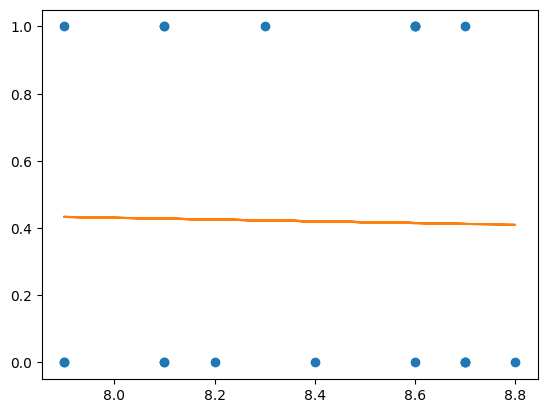

In [16]:
import matplotlib.pyplot as plt


work = np.array([1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0])

print(f'Linear Regression: {linear_regression(y, work)}')
print(f'Correlation: {np.corrcoef(y, work)[0][1]}')

# Plot linear graph.
plt.plot(y, work, 'o')
plt.plot(y, linear_regression(y, work)(y))

Linear Correlation Coefficient: -0.16413323120398224
y = -0.030561122244482538x + 9.045591182364586


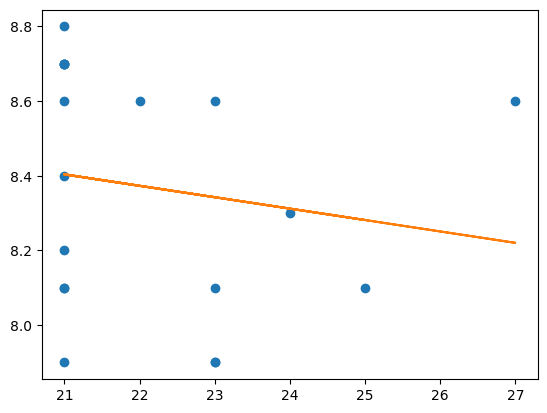

In [13]:
import matplotlib.pyplot as plt

# print linear correlation coefficient
print(f'Linear Correlation Coefficient: {np.corrcoef(x, y)[0][1]}')

# Plot linear graph.
plt.plot(x, y, 'o')
plt.plot(x, linear_regression(x, y)(x))